In [1]:
import jams
import jams.display
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.style as ms
ms.use('seaborn-deep')
ms.use('seaborn-darkgrid')
import matplotlib.colors as mc
import seaborn as sns

In [2]:
pal = [mc.colorConverter.to_rgb(_) for _ in sns.color_palette()]

In [113]:
#jam = jams.load('../data/SALAMI/829.jams')
jam = jams.load('../data/SALAMI/456.jams')

<IPython.core.display.Javascript object>


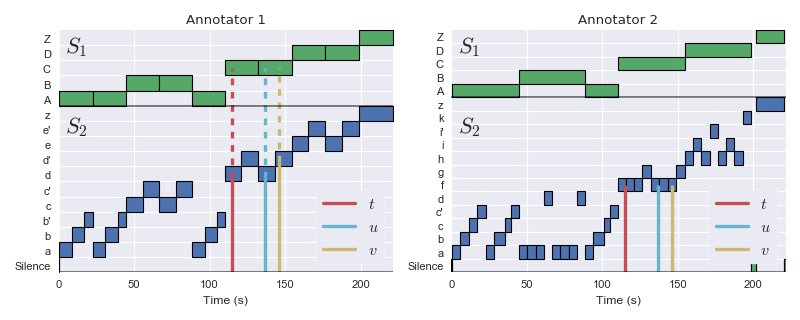

In [132]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1,2,1)

ax = jams.display.display(jam.annotations['multi', 0], meta=False, ax=ax1)

plt.title('Annotator 1')
plt.xlabel('Time (s)')
plt.text(.02, 0.98, r'$S_1$', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', fontdict=dict(size=20))
plt.text(.02, 0.65, r'$S_2$', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', fontdict=dict(size=20))


# Times for track 829
t, u, v = 82, 105, 122
# Times for track 456
t, u, v = 115, 137, 146

ht, hu, hv = 6.25, 6.25, 7.25
yt, yu, yv = 13.5, 13.5, 13.5

lines = []
lines.append(plt.vlines([t], 0, ymax=ht, color=pal[2], label=r'$t$', linewidth=3))
lines.append(plt.vlines([u], 0, ymax=hu, color=pal[5], label=r'$u$', linewidth=3))
lines.append(plt.vlines([v], 0, ymax=hv, color=pal[4], label=r'$v$', linewidth=3))

plt.vlines([t], ht, ymax=yt, color=pal[2], linestyle='--', linewidth=3)
plt.vlines([u], hu, ymax=yu, color=pal[5], linestyle='--', linewidth=3)
plt.vlines([v], hv, ymax=yv, color=pal[4], linestyle='--', linewidth=3)

plt.legend(handles=lines, loc=4, frameon=True, fontsize='large')


ax2 = plt.subplot(1,2,2, sharex=ax1)

ax = jams.display.display(jam.annotations['multi', 1], meta=False, ax=ax2)

plt.title('Annotator 2')

plt.xlabel('Time (s)')
plt.text(.02, 0.98, r'$S_1$', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', fontdict=dict(size=20))
plt.text(.02, 0.65, r'$S_2$', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', fontdict=dict(size=20))


ht, hu, hv = 6.5, 6.5, 6.5

lines = []
lines.append(plt.vlines([t], 0, ymax=ht, color=pal[2], label=r'$t$', linewidth=3))
lines.append(plt.vlines([u], 0, ymax=hu, color=pal[5], label=r'$u$', linewidth=3))
lines.append(plt.vlines([v], 0, ymax=hv, color=pal[4], label=r'$v$', linewidth=3))


plt.legend(handles=lines, loc=4, frameon=True, fontsize='large')





plt.tight_layout()

In [133]:
fig.savefig('../data/figures/lmeasure.pdf', pad_inches=0)

---
# Features

In [3]:
import numpy as np

In [4]:
from IPython.display import Audio

In [5]:
import librosa
import librosa.display

In [20]:
#idx = 765
idx = 936
#idx = 160
#idx = 10
data = np.load('../data/features/SALAMI/{}.npz'.format(idx))
audio = '/home/bmcfee/data/salami-data-public/audio/{}/audio.mp3'.format(idx)

<IPython.core.display.Javascript object>


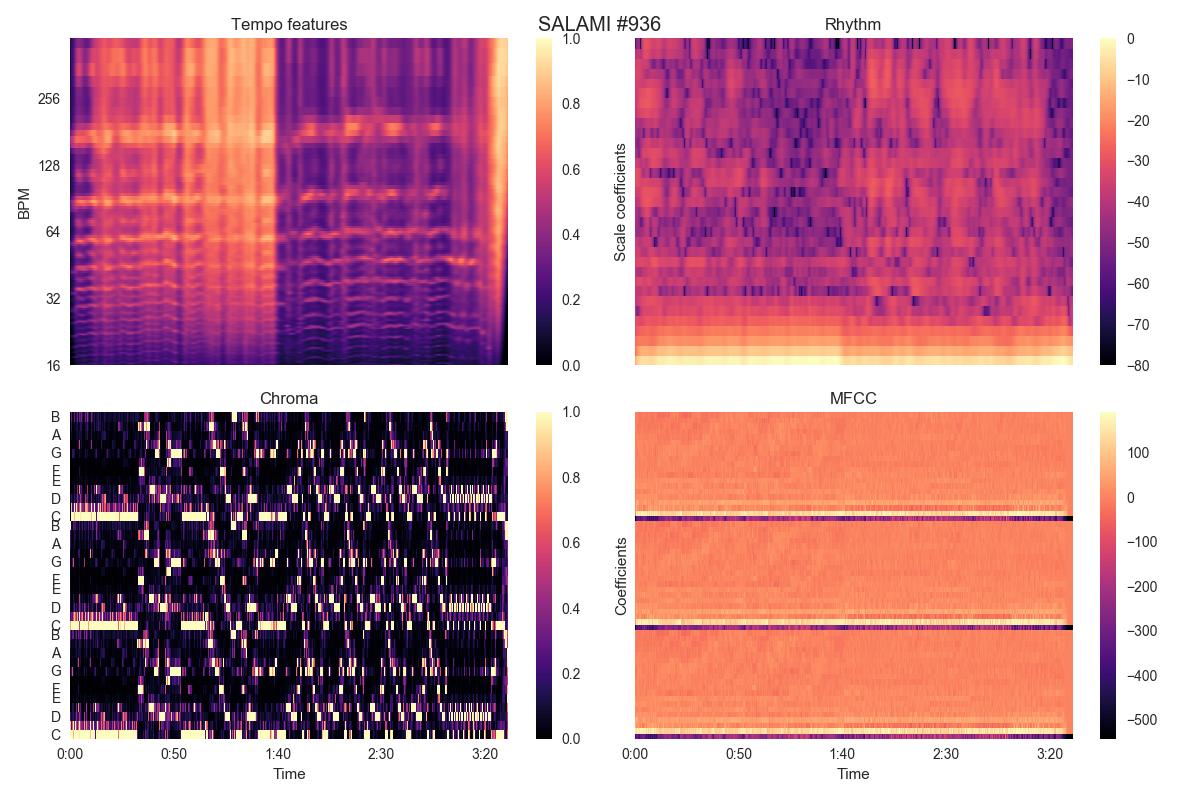

In [25]:
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(2,2,1)
librosa.display.specshow(data['tempo'], y_axis='tempo', cmap='magma')
plt.title('Tempo features')
plt.colorbar()
ax1.xaxis.set_visible('False')
ax1.xaxis.set_label('')

ax2 = plt.subplot(2,2,2)
librosa.display.specshow(librosa.logamplitude(data['rhythm']**2, ref_power=np.max))
plt.title('Rhythm')
plt.ylabel('Scale coefficients')
plt.colorbar()
ax2.xaxis.set_visible('False')
ax2.xaxis.set_label('')

ax3 = plt.subplot(2,2,3)
librosa.display.specshow(data['chroma'], y_axis='chroma', cmap='magma', x_axis='time', sr=4, hop_length=1)
plt.title('Chroma')
plt.ylabel('')
plt.colorbar()

ax4 = plt.subplot(2,2,4)
librosa.display.specshow(data['mfcc'], cmap='magma', x_axis='time', sr=4, hop_length=1)
plt.title('MFCC')
plt.ylabel('Coefficients')
plt.colorbar()

plt.suptitle('SALAMI #{}'.format(idx))
plt.tight_layout()

In [26]:
fig.savefig('../data/figures/features_{}.pdf'.format(idx))

In [22]:
Audio(filename=audio)